In [11]:
# This notebook illustrates example outputs from Funman, and how to work with the ParameterSpace object it creates.

# Import funman related code

from pathlib import Path
from funman import FunmanResults
import json
from funman import Point, Box, Parameter
from typing import List, Dict

# %load_ext autoreload
# %autoreload 2

In [9]:
SAVED_RESULTS_DIR = Path("saved-results").resolve()
SAVED_RESULT_FILES = [
    "d6f61dc8-79a8-44e0-8b9c-f7abc79b45d8.json"
]
SAVED_RESULT_TO_USE = SAVED_RESULTS_DIR / SAVED_RESULT_FILES[0]

with open(SAVED_RESULT_TO_USE, "r") as f:
    # Create a FunmanResults object
    results: FunmanResults = FunmanResults.model_validate(json.load(f))

print(f"Model has the symbols: {results.model._symbols()}")

Model has the symbols: ['Susceptible', 'Diagnosed', 'Infected', 'Ailing', 'Recognized', 'Healed', 'Threatened', 'Extinct', 'beta', 'gamma', 'delta', 'alpha', 'epsilon', 'zeta', 'lambda', 'eta', 'rho', 'theta', 'kappa', 'mu', 'nu', 'xi', 'tau', 'sigma', 't']


<Axes: title={'center': 'Point Trajectories'}, xlabel='Time', ylabel='Infected'>

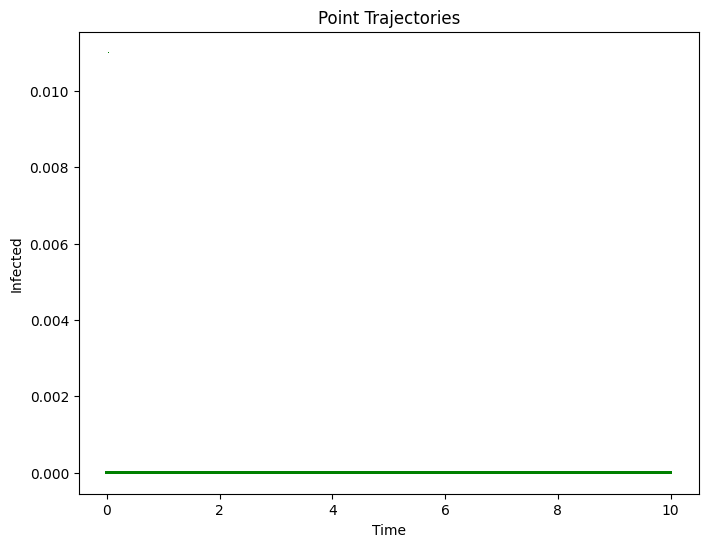

In [10]:
# Plot the trajectories for each point in the ParameterSpace

results.plot(variables=["Infected"], label_marker={"true":",", "false": ","},  xlabel="Time", ylabel="Infected")


In [4]:
# Example uses the result object created by FUNMAN
# - Get the points and boxes
# - Get the parameters corresponding to a point
# - Generate a dataframe with the point timeseries



points: List[Point] = results.points()
boxes: List[Box] = results.parameter_space.boxes()

num_true_points = len(results.parameter_space.true_points())
num_false_points = len(results.parameter_space.false_points())
num_true_boxes = len(results.parameter_space.true_boxes)
num_false_boxes = len(results.parameter_space.false_boxes)

print(
    f"{len(points)} Points (+:{num_true_points}, -:{num_false_points}), {len(boxes)} Boxes (+:{num_true_boxes}, -:{num_true_boxes})"
)
if points and len(points) > 0:
    point: Point = points[-1]
    parameters: Dict[Parameter, float] = results.point_parameters(point)
    print(parameters)
    print(results.dataframe([point]))
else:
    # if there are no points, then we have a box that we found without needing points

    box = boxes[0]
    print(json.dumps(box.explain(), indent=4))

37 Points (+:28, -:9), 37 Boxes (+:28, -:9)
{beta[0.011, 0.011): 0.011, gamma[0.456, 0.456): 0.456, delta[0.011, 0.011): 0.011, alpha[0.57, 0.57): 0.57, epsilon[0.1368, 0.20520000000000002): 0.1851337291300297, zeta[0.125, 0.125): 0.125, lambda[0.034, 0.034): 0.034, eta[0.125, 0.125): 0.125, rho[0.034, 0.034): 0.034, theta[0.2968, 0.4452): 0.3694555829524995, kappa[0.017, 0.017): 0.017, mu[0.017, 0.017): 0.017, nu[0.027, 0.027): 0.027, xi[0.017, 0.017): 0.017, tau[0.01, 0.01): 0.01, sigma[0.017, 0.017): 0.017}
                    Ailing     Diagnosed       Extinct        Healed  \
time                                                                   
0.000000e+00  1.666667e-08  3.333333e-07  0.000000e+00  0.000000e+00   
3.333333e-09  1.833333e-08  3.033333e-07  3.333333e-09  3.333333e-09   
6.666667e-09  2.000000e-08  2.733333e-07  6.666667e-09  6.666667e-09   
1.000000e-08  2.166667e-08  2.433333e-07  1.000000e-08  1.000000e-08   
1.333333e-08  2.333333e-08  2.133333e-07  1.333333e-

In [5]:
# Get the corner points of a box

results.parameter_space.false_boxes[0].corner_points

[]

In [6]:
# Get the state varibles and parameters from a point (used by the dataframe timeseries function above)

results.parameter_space.true_points[0].values

TypeError: 'method' object is not subscriptable

In [ ]:
# Plot the parameter space

from funman_demo.parameter_space_plotter import ParameterSpacePlotter
ParameterSpacePlotter(
        results.parameter_space, plot_points=True, parameters=["beta", "gamma", "timestep"]
    ).plot(show=False)

In [ ]:
# Plot the timeseries for each point in the parameter space for the selected variables

results.plot(variables=["I"], label_marker={"true":",", "false": ","})

In [ ]:
# Plot the points from a saved result file.

from funman.server.query import FunmanResults
import json

# %load_ext autoreload
# %autoreload 2
with open("out/f13f5edb-41ba-4a70-bcc6-0bb9881ce71c.json", "r") as f:
    results = FunmanResults.model_validate(json.load(f))
    results.plot(variables=["I"], label_marker={"true":",", "false": ","})

In [ ]:
print(results.parameter_space.false_boxes[1].explain(  ))
results.plot(points=results.parameter_space.false_boxes[1].corner_points, variables=["I"], label_marker={"true":",", "false": ","})